In [1]:
from espuma import Case_Directory, Boundary_Probe
import matplotlib.pyplot as plt

In [2]:
try:
    of_template = Case_Directory("../templates/first_order_adsorption/rssct")
    of_case = Case_Directory.clone_from_template(
        of_template, "_column_case_3min", overwrite=False
    )
except OSError:
    of_case = Case_Directory("_column_case_3min")

In [3]:
of_case

Case_Directory(/home/edwin/Repositories/cowerc-adsorption/notebooks/_column_case_3min)

In [4]:
of_case.system.controlDict["application"]

'pfasFoam'

In [5]:
of_case.zero.pfoa_aq["internalField"]

'uniform 0'

In [6]:
of_case.constant.transportProperties["DT"]

'DT [ 0 2 -1 0 0 0 0 ] 0'

In [7]:
of_case.zero.darcyFlux["internalField"]

'uniform ( 0 0 -0.00627 )'

In [8]:
# of_case._blockMesh()
# of_case._runCase()

In [9]:
prb = Boundary_Probe(of_case, of_case.system.boundaryProbes)
data = prb.array_data

espuma_BoundaryProbes already exists :)


In [10]:
data

<xarray.Dataset> Size: 32kB
Dimensions:   (probes: 2, time: 270)
Coordinates:
  * probes    (probes) object 16B Point(x=0.0, y=0.0, z=0.0) Point(x=0.0, y=0...
  * time      (time) float64 2kB 600.0 1.2e+03 1.8e+03 ... 1.614e+05 1.62e+05
Data variables:
    bez_aq    (probes, time) float64 4kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    dcf_aq    (probes, time) float64 4kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    genx_aq   (probes, time) float64 4kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    pfba_aq   (probes, time) float64 4kB 1.032e-06 1.032e-06 ... 1.032e-06
    pfhxa_aq  (probes, time) float64 4kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    pfhxs_aq  (probes, time) float64 4kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    pfoa_aq   (probes, time) float64 4kB 1.371e-07 1.431e-07 ... 1.525e-06

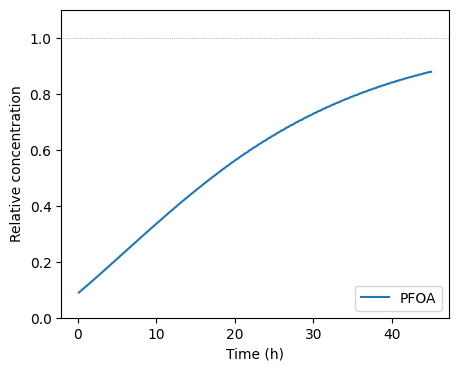

In [11]:
v = data["pfoa_aq"]

fig, ax = plt.subplots(figsize=(5, 4))
rel_conc = v.isel(probes=0) / v.isel(probes=1)
t_hours = data.time / 3600
ax.plot(t_hours, rel_conc, label="PFOA")
ax.legend()
ax.set_ylim(0, 1.1)
ax.axhline(1, color="gray", ls="dotted", lw=0.5)
ax.set_ylabel("Relative concentration")
ax.set_xlabel("Time (h)")
plt.show()